In [718]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import random
from random import sample

In [722]:
data=pd.read_csv('data.csv')

In [723]:
dataPlist = np.arange(28,88)
dataPlist = list(dataPlist)
dataset = data.iloc[:, dataPlist]
dataset = dataset.dropna()
dataset = dataset.reset_index().iloc[:,1:]

In [724]:
dataset.head(3)

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0


In [725]:
for col in np.arange(26): #26 = RB
    
    operand1,operand2 = zip(*dataset.iloc[:,col].str.split('+'))

    operand1 = [int(x) for x in list(operand1)]
    operand2 = [int(x) for x in list(operand2)]

    lists_of_lists = [operand1, operand2]
    dataset.iloc[:,col] = [sum(x) for x in zip(*lists_of_lists)]
    
for i in np.arange(26,60):
    dataset.iloc[:,i] = [int(x) for x in dataset.iloc[:,i]]

In [494]:
# X = dataset.iloc[:,:-1].values #sisanya ID
X

array([[90., 90., 90., ..., 15., 14.,  8.],
       [94., 94., 94., ..., 15., 14., 11.],
       [87., 87., 87., ..., 15., 15., 11.],
       ...,
       [47., 47., 47., ..., 10.,  6., 13.],
       [49., 49., 49., ..., 14.,  8.,  9.],
       [45., 45., 45., ...,  9., 12.,  9.]])

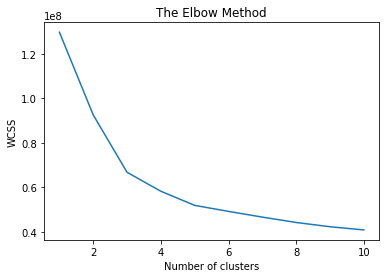

In [495]:
# Optimum Cluster Centroid
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# start here

In [651]:
# le1 = X[6433]
# le2 = X[12695]
# le3 = X[10524]
# le4 = X[13219]
# le5 = X[4219]

# initial_centroid = np.array([le1,le2,le3,le4,le5])

In [675]:
initial_centroids = []
rand = random.sample(range(X.shape[0]),5) #random sample. param 1 = list
for i in rand:
    initial_centroids.append(list(X[i]))
initial_centroid = np.array(initial_centroids)

In [687]:
#Find the closest centroid
def distSquared(point,centroid):
    dist = np.sum(np.square(centroid-point))
    return(dist)

def findClosestCentroids(myX,initial_centroid):
    
    idxs = np.zeros((myX.shape[0],1))
    
    #loop through each data point in X
    #setiap data(X) ke -> setiap centroid (bukan sebaliknya)
    for x in np.arange(idxs.shape[0]):
        
        mypoint =  myX[x]
        mindist, idx = 9999999,0
        
        for i in np.arange(np.shape(initial_centroid)[0]):
            
            mycentroid = initial_centroid[i]
            distsquared = distSquared(mypoint,mycentroid)
            if distsquared < mindist:
                mindist = distsquared
                idx = i
                
        idxs[x] = idx
    return (idxs)

In [677]:
idxs = findClosestCentroids(X, initial_centroid)

##### 1.1.2 Computing centroid means

In [688]:
def computeCentroids(myX, myidxs):
    """
    Function takes in the X matrix and the index vector
    and computes a new centroid matrix.
    """
    
    #subX = isinya ada 5 KELOMPOK. 5 ARRAY. 
    #yg nantinya akan dicari nilai rata2nya dari tiap kelompok tersebut
    subX = []
    for x in np.arange(len(np.unique(myidxs))):
        subX.append(np.array([myX[i] for i in np.arange(myX.shape[0]) if myidxs[i] == x]))
    return np.array([np.mean(thisX,axis=0) for thisX in subX])

# CEK AJA

In [681]:
# myX = X
# myidxs = idxs

# #subX = isinya ada 5 KELOMPOK. 5 ARRAY. 
# #yg nantinya akan dicari nilai rata2nya dari tiap kelompok tersebut
# subX = []
# for x in np.arange(len(np.unique(myidxs))):
#     subX.append(np.array([myX[i] for i in np.arange(myX.shape[0]) if myidxs[i] == x]))
# meannya = np.array([np.mean(thisX,axis=0) for thisX in subX])

In [685]:
# len(subX)

5

In [684]:
# len(meannya)

5

# run beberapa kali untuk mendapatkan centroid yg optimal

In [689]:
def runKMeans(myX, initial_centroids, K, n_iter):
    """
    Function that actually does the iterations
    """
    centroid_history = []
    current_centroids = initial_centroids
    for myiter in np.arange(n_iter):
        centroid_history.append(current_centroids)
        idxs = findClosestCentroids(myX,current_centroids)
        current_centroids = computeCentroids(myX,idxs)
        
    return idxs, centroid_history

In [502]:
idxs, centroid_history = runKMeans(X,initial_centroids,K=3,n_iter=10)

# pilih centroid secara random

In [726]:
def chooseKRandomCentroids(myX, K):
    rand_indices = sample(range(0,myX.shape[0]),K)
    return np.array([myX[i] for i in rand_indices])    

# run beberapa kali untuk mendapatkan model yang optimal (bergantung pada nilai cost functionnya)

In [703]:
for x in np.arange(3):
    idxs, centroid_history = runKMeans(X,chooseKRandomCentroids(X,K=5),
                                       K=5,n_iter=10)

In [727]:
distSquared(X,idxs)

3000358035.0

# USING LIBRARY KMEANS

In [507]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [508]:
y_kmeans

array([0, 0, 0, ..., 3, 3, 1], dtype=int32)

In [509]:
dataset['clustKM'] = y_kmeans

In [511]:
dataset.clustKM.unique()

array([0, 4, 2, 1, 3])

In [512]:
dataset.groupby('clustKM').count()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,clust
clustKM,,,,,,,,,,,,,,,,,,,,,
0,3243,3243,3243,3243,3243,3243,3243,3243,3243,3243,...,3243,3243,3243,3243,3243,3243,3243,3243,3243,3243
1,2693,2693,2693,2693,2693,2693,2693,2693,2693,2693,...,2693,2693,2693,2693,2693,2693,2693,2693,2693,2693
2,4326,4326,4326,4326,4326,4326,4326,4326,4326,4326,...,4326,4326,4326,4326,4326,4326,4326,4326,4326,4326
3,3031,3031,3031,3031,3031,3031,3031,3031,3031,3031,...,3031,3031,3031,3031,3031,3031,3031,3031,3031,3031
4,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,...,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829


In [515]:
from sklearn.metrics import pairwise_distances_argmin_min 
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)

In [516]:
closest

array([ 6433, 12695, 10524, 13219,  4219])

In [728]:
kmeans.score(X)

-51839660.155299746